# An Introduction to the Discrete Fourier Transform

## Solutions
## Exercises: Filtering out noise. This notebook outlines the step to filter out high frequency noise from an audio recording. 

In [1]:
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt
from scipy.io import wavfile
%matplotlib notebook

#### Read in the "trumpet_chirp.wav" file. Play the audio and notice the high pitch noise on top of a trumpet note. 


In [2]:
fs, ys = wavfile.read("trumpet_chirp.wav")

In [3]:
Audio(ys, rate = fs)

#### Use `plot_signal_frequency` below to plot the frequency domain to see the frequencies in the signal. Note that the signal has a linear sweep of high frequencies, which is the noise that you hear. Zoom in using `plot_signal_frequency` and estimate the range of these frequencies.

In [4]:
def plot_signal_frequency(ys, f1, f2, fs = 44100):
    """ plots the signal ys on the frequency domain [f1, f2] 
    at the sampling rate fs. 
    """
    N = ys.size
    L = N/fs
    yk = np.fft.fft(ys)
    k = np.arange(N) # 0 to N-1
    freqs = k/L
    fig, ax = plt.subplots()
    ax.plot(freqs, np.abs(yk))
    ax.set_xlim(f1,f2)
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("|yk|")
    

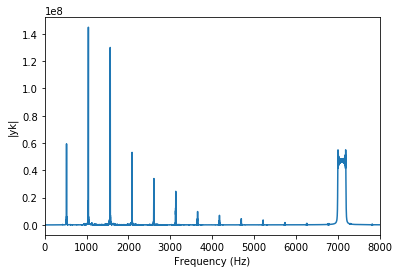

In [5]:
plot_signal_frequency(ys, 0, 8000)#### Use `plot_signal_frequency` below to plot the frequency domain to see the frequencies in the signal. Note that the signal has a linear sweep of high frequencies, which is the noise that you hear. Zoom in using `plot_signal_frequency` and estimate the range of these frequencies.

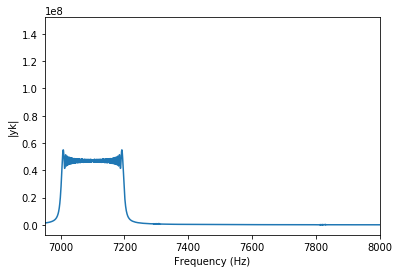

In [6]:
plot_signal_frequency(ys, 6950, 8000)

#### Since our signal is real, for this problem, use `np.fft.rfft` to apply the discrete fourier transform. Note that this function only returns half of the Fourier coefficients. It ignores the second symmetric half. Thus, we're only considering the frequencies up to the Nyquist frequency. 

In [7]:
yk = np.fft.rfft(ys)
N = ys.size
fs = 44100
L = N/fs
k = np.arange(yk.size) 
fk = k/L
print(yk.size) # only half of the Fourier coefficients
print(fk[-1]) # highest frequency is half of sampling rate fs = Nyquist frequency

50001
22050.0


#### Use $f_k=k/L$ to estimate the beginning index of the noisy linear sweep of frequencies. 

In [8]:
6900*L

15646.258503401361

#### Now zero out the high frequencies on the frequency domain. Hint: Use slicing, for example `yk[index:]` gives you access to the subsequence of the array `yk` beginning at `index` to the end of the array.

In [9]:
yk[15600:] = 0

#### Now apply the Inverse Fourier Transform by using `np.fft.irfft()` to convert the Fourier coefficients back to the samples, the time domain representation. Store your result in the array `filtered_ys`.

In [22]:
filtered_ys = np.fft.irfft(yk)

#### Create the Audio object with `filtered_ys`. Then play the Audio. Note that the high frequencies are filtered out!

In [23]:
Audio(filtered_ys, rate = fs) # filtered audio

In [16]:
Audio(ys, rate = fs) # original audio

#### Call `plot_signal_frequency` to plot the Fourier coefficients to show that the high frequencies noise is filtered out. 

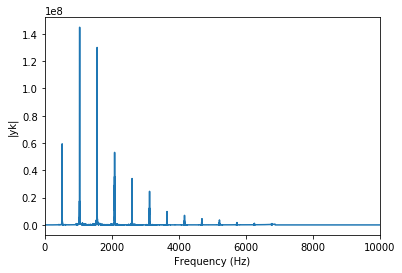

In [21]:
plot_signal_frequency(filtered_ys, 0,10000)

#### Finally, use `wavfile.write(filename, rate, data)` to write the array filtered_ys to a wave file with the noise removed.

In [25]:
wavfile.write("filtered.wav", fs, filtered_ys)